In [1]:
import pandas as pd
import numpy as np

from datetime import datetime

%matplotlib inline
pd.set_option('display.max_rows', 500)

![CRISP_DM](../reports/figures/CRISP_DM.png)

# Data Preparation

* focus is always to understand the final data structure
* support each step by visual analytics

## Johns Hopkins GITHUB csv data


In [2]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)

In [3]:
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [4]:
time_idx=pd_raw.columns[4:]

In [5]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [6]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                   Antigua and Barbuda
6                             Argentina
7                               Armenia
8                             Australia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                              Austria
17                           Azerbaijan
18                              Bahamas
19                              Bahrain
20                           Bangladesh
21                             Barbados
22                              Belarus
23                              Belgium
24                               Belize


In [7]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [8]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [9]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

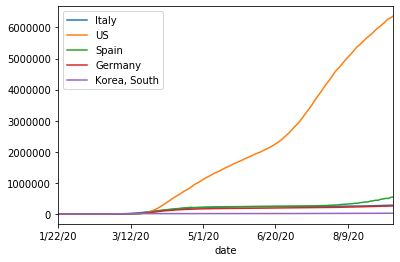

In [10]:
%matplotlib inline
df_plot.set_index('date').plot()

## Data Type Date

In [11]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3


In [12]:
time_idx=[datetime.strptime( each,"%m/%d/%y") for each in df_plot.date]
time_str=[each.strftime('%Y-%m-%d') for each in time_idx] 

In [13]:
df_plot['date']=time_idx
type(df_plot['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
df_plot.head()

,date,Italy,US,Spain,Germany,"Korea, South"
0,2020-01-22,0,1,0,0,1
1,2020-01-23,0,1,0,0,1
2,2020-01-24,0,2,0,0,2
3,2020-01-25,0,2,0,0,2
4,2020-01-26,0,5,0,0,3


In [15]:
df_plot.to_csv('../data/processed/COVID_small_flat_table.csv',sep=';',index=False)

## Relational data model - defining a primary key

In the relational model of databases, a primary key is a specific choice of a minimal set of attributes (columns) that uniquely specify a tuple (row) in a relation (table) (source: wiki)


A primary key’s main features are:

* It must contain a unique value for each row of data.
* It cannot contain null values.

In [16]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)
pd_raw.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [17]:
pd_data_base=pd_raw.rename(columns={'Country/Region':'country',
                      'Province/State':'state'})
pd_data_base['state']=pd_data_base['state'].fillna('no')  

In [18]:
pd_data_base=pd_data_base.drop(['Lat','Long'],axis=1)
pd_data_base.head()

,state,country,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,no,Afghanistan,0,0,0,0,0,0,0,0,...,38165,38196,38243,38288,38304,38324,38398,38494,38520,38544
1,no,Albania,0,0,0,0,0,0,0,0,...,9513,9606,9728,9844,9967,10102,10255,10406,10553,10704
2,no,Algeria,0,0,0,0,0,0,0,0,...,44494,44833,45158,45469,45773,46071,46364,46653,46938,47216
3,no,Andorra,0,0,0,0,0,0,0,0,...,1176,1184,1199,1199,1215,1215,1215,1261,1261,1301
4,no,Angola,0,0,0,0,0,0,0,0,...,2654,2729,2777,2805,2876,2935,2965,2981,3033,3092


In [19]:
pd_relational_model=pd_data_base.set_index(['state','country']) \
                                .T                              \
                                .stack(level=[0,1])             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model.head()


,date,state,country,confirmed
0,1/22/20,Alberta,Canada,0.0
1,1/22/20,Anguilla,United Kingdom,0.0
2,1/22/20,Anhui,China,1.0
3,1/22/20,Aruba,Netherlands,0.0
4,1/22/20,Australian Capital Territory,Australia,0.0


In [20]:
pd_relational_model.dtypes

date          object
state         object
country       object
confirmed    float64
dtype: object

In [21]:
pd_relational_model['date']=pd_relational_model.date.astype('datetime64[ns]')

In [22]:
pd_relational_model.dtypes

date         datetime64[ns]
state                object
country              object
confirmed           float64
dtype: object

In [23]:
pd_relational_model.confirmed=pd_relational_model.confirmed.astype(int)

pd_relational_model.to_csv('../data/processed/COVID_relational_confirmed.csv',sep=';',index=False)

In [24]:
print(pd_relational_model[pd_relational_model['country']=='US'].tail())

            date state country  confirmed
60634 2020-09-05    no      US    6244970
60900 2020-09-06    no      US    6276365
61166 2020-09-07    no      US    6300622
61432 2020-09-08    no      US    6327009
61698 2020-09-09    no      US    6361265


## Attention due to the new structure of the Johns Hopkins data set the state information US is in a second file

In [25]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv'
pd_raw_US=pd.read_csv(data_path)
pd_raw_US.head()



,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,8/31/20,9/1/20,9/2/20,9/3/20,9/4/20,9/5/20,9/6/20,9/7/20,9/8/20,9/9/20
0,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,1348,1354,1345,1349,1355,1371,1377,1383,1385,1398
1,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,4422,4445,4458,4495,4513,4542,4569,4586,4609,4639
2,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,628,629,617,614,616,616,616,617,617,618
3,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,535,538,541,542,545,550,555,557,562,564
4,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,1034,1045,1036,1037,1049,1062,1065,1070,1071,1082


In [26]:

pd_raw_US=pd_raw_US.drop(['UID', 'iso2', 'iso3', 'code3', 'Country_Region','FIPS', 'Admin2',  'Lat', 'Long_', 'Combined_Key'],axis=1)
pd_data_base_US=pd_raw_US.rename(columns={'Province_State':'state'}).copy()


In [29]:

pd_relational_model_US=pd_data_base_US.set_index(['state']) \
                                .T                              \
                                .stack()             \
                                .reset_index()                  \
                                .rename(columns={'level_0':'date',
                                                   0:'confirmed'},
                                                  )
pd_relational_model_US['country']='US'
pd_relational_model_US['date']=[datetime.strptime( each,"%m/%d/%y") for each in pd_relational_model_US.date] 
pd_relational_model_US.head()

,date,state,confirmed,country
0,2020-01-22,Alabama,0,US
1,2020-01-22,Alabama,0,US
2,2020-01-22,Alabama,0,US
3,2020-01-22,Alabama,0,US
4,2020-01-22,Alabama,0,US


In [30]:
pd_relational_model_all=pd_relational_model[pd_relational_model['country']!='US'].reset_index(drop=True)

In [31]:
pd_relational_model_all=pd.concat([pd_relational_model_all,pd_relational_model_US],ignore_index=True)

C:\Users\Shilpa Narayan\jupyterpython\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [32]:
pd_relational_model_all.to_csv('../data/processed/20200424_COVID_relational_confirmed.csv',sep=';',index=False)

In [33]:
print(pd_relational_model_all[pd_relational_model_all['country']=='US'])

        confirmed country       date    state
61480           0      US 2020-01-22  Alabama
61481           0      US 2020-01-22  Alabama
61482           0      US 2020-01-22  Alabama
61483           0      US 2020-01-22  Alabama
61484           0      US 2020-01-22  Alabama
...           ...     ...        ...      ...
836355        451      US 2020-09-09  Wyoming
836356        308      US 2020-09-09  Wyoming
836357          0      US 2020-09-09  Wyoming
836358        111      US 2020-09-09  Wyoming
836359         21      US 2020-09-09  Wyoming

[774880 rows x 4 columns]


### cross check on full sum US data

In [34]:
check_US=pd_relational_model_all[pd_relational_model_all['country']=='US']

In [35]:

check_US[['date','country','confirmed']].groupby(['date','country']).sum()

,,confirmed
date,country,
2020-01-22,US,1
2020-01-23,US,1
2020-01-24,US,2
2020-01-25,US,2
2020-01-26,US,5
2020-01-27,US,5
2020-01-28,US,5
2020-01-29,US,5
2020-01-30,US,5
